In [1]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
import math
import time

In [3]:
%matplotlib inline 
plt.rcParams['figure.figsize'] = (16, 12)

mypath =  r'G:\My Drive\Dropbox\IIM-Aditya\Teaching\Executive courses\MSDSM -Business Analytics\codes\Regression\\'

elemapi = pd.read_csv(mypath + r'elemapi.csv')   

print(elemapi[['api00', 'acs_k3', 'meals',  'full']].head())

   api00 acs_k3  meals  full
0    693     16     67    76
1    570     15     92    79
2    546     17     97    68
3    571     20     90    87
4    478     18     89    87


---------------------------------------- smf.ols in R formula ----------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     571.0
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           6.54e-79
Time:                        19:52:08   Log-Likelihood:                -2372.1
No. Observations:                 400   AIC:                             4748.
Df Residuals:                     398   BIC:                             4756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

Text(0.5, 1.0, 'Linear Regression Plot')

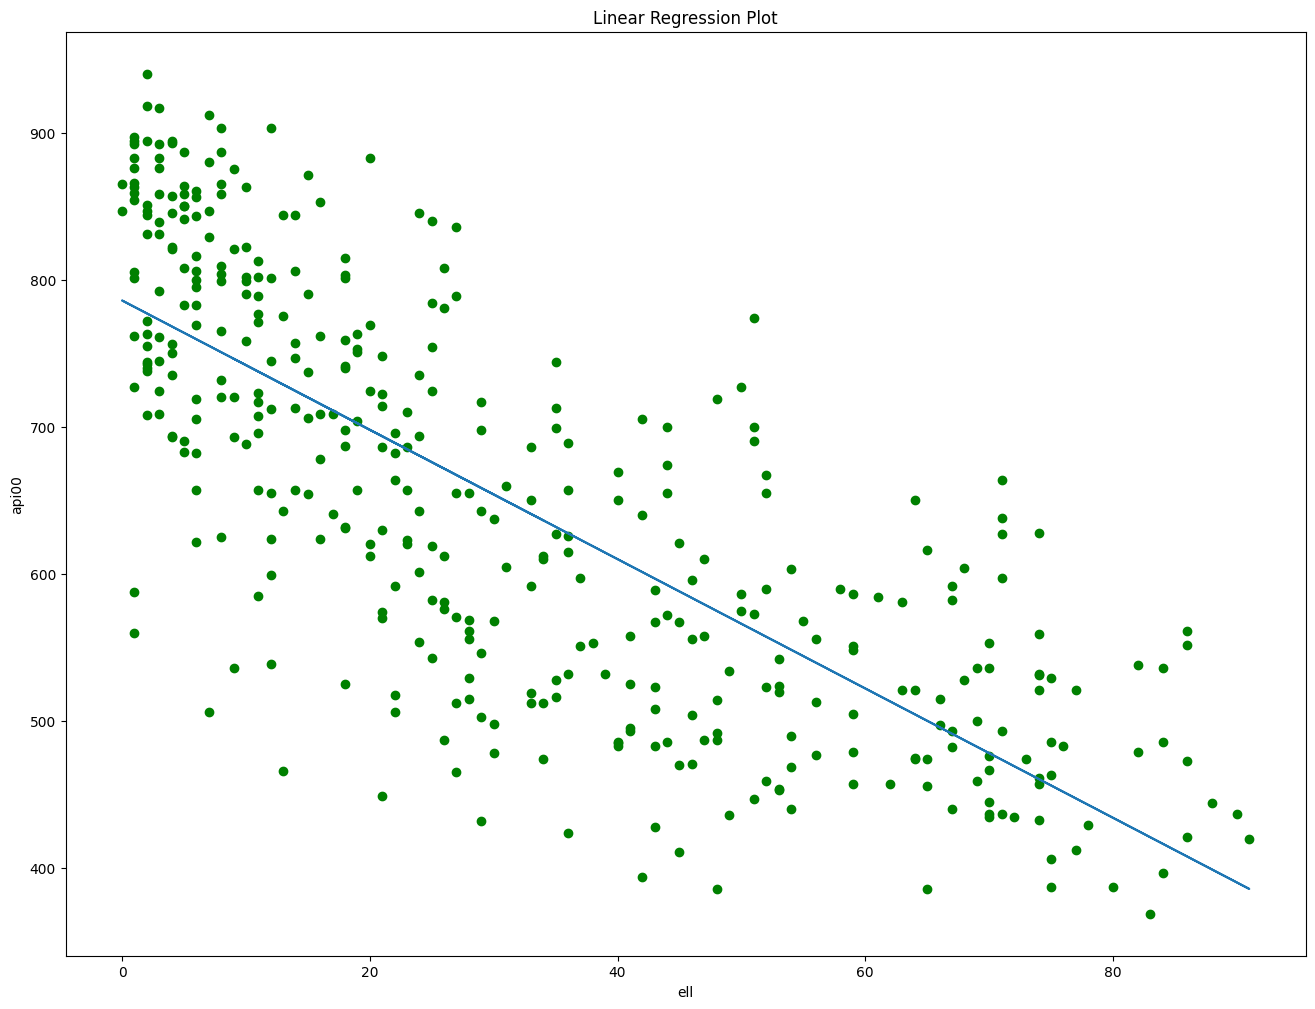

In [4]:
'''
1. using formula as R did
'''
print( '-'*40 + ' smf.ols in R formula ' + '-'*40 + '\n')
lm = smf.ols(formula = 'api00 ~ ell', data = elemapi).fit()
print(lm.summary())

plt.figure()
plt.scatter(elemapi.ell, elemapi.api00, c = 'g')
plt.plot(elemapi.ell, lm.params[0] + lm.params[1] * elemapi.ell)
plt.xlabel('ell')
plt.ylabel('api00')
plt.title("Linear Regression Plot")

**Alternative way**

In [4]:
print('-'*40 + ' sm.OLS with direct input data ' + '-'*40 + '\n')
lm2 = sm.OLS(elemapi['api00'], sm.add_constant(elemapi[['ell']])).fit()
print(lm2.summary())

---------------------------------------- sm.OLS with direct input data ----------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     571.0
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           6.54e-79
Time:                        12:08:45   Log-Likelihood:                -2372.1
No. Observations:                 400   AIC:                             4748.
Df Residuals:                     398   BIC:                             4756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

**Multiple variable regression**



In [8]:
list(elemapi)

['snum',
 'dnum',
 'api00',
 'api99',
 'growth',
 'meals',
 'ell',
 'yr_rnd',
 'mobility',
 'acs_k3',
 'acs_46',
 'not_hsg',
 'hsg',
 'some_col',
 'col_grad',
 'grad_sch',
 'avg_ed',
 'full',
 'emer',
 'enroll',
 'mealcat',
 'collcat',
 'abv_hsg',
 'lgenroll']

In [15]:
type(elemapi)

pandas.core.frame.DataFrame

In [5]:
'''
1. using formula as R did
'''
lm = smf.ols(formula = 'api00 ~  full+enroll', data = elemapi).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     105.7
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.63e-37
Time:                        19:53:00   Log-Likelihood:                -2464.8
No. Observations:                 400   AIC:                             4936.
Df Residuals:                     397   BIC:                             4947.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    266.1639     41.369      6.434      0.0

In [18]:
'''
1. using formula as R did
'''
lm = smf.ols(formula = 'api00 ~  meals + full', data = elemapi).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     935.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          6.17e-151
Time:                        20:39:50   Log-Likelihood:                -2201.6
No. Observations:                 400   AIC:                             4409.
Df Residuals:                     397   BIC:                             4421.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    759.6479     24.251     31.325      0.0

**Data Analysis**

In [6]:
sample_data = elemapi[['api00', 'acs_k3', 'meals',  'full']]
print (sample_data.describe())

            api00       meals        full
count  400.000000  400.000000  400.000000
mean   647.622500   60.315000   84.550000
std    142.248961   31.911701   14.949791
min    369.000000    0.000000   37.000000
25%    523.750000   31.000000   76.000000
50%    643.000000   67.500000   88.000000
75%    762.250000   90.000000   97.000000
max    940.000000  100.000000  100.000000


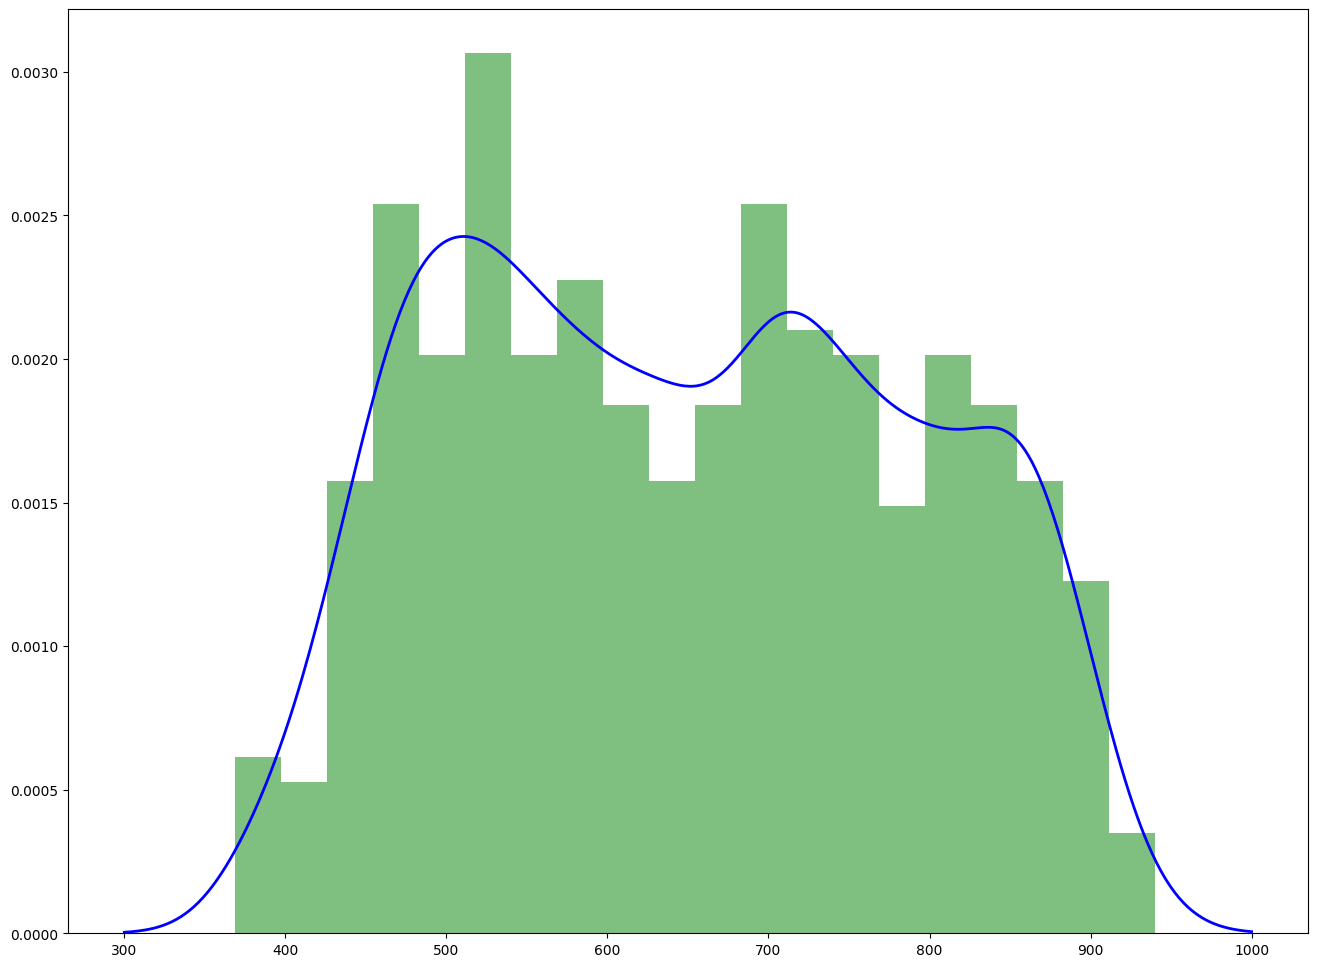

In [7]:
from scipy.stats import gaussian_kde


plt.hist(elemapi.api00, 20,density=True, facecolor = 'g', alpha = 0.5)
# add density plot
density = gaussian_kde(elemapi.api00)
xs = np.linspace(300, 1000, 500)
density.covariance_factor = lambda : .2
density._compute_covariance()


plt.plot(xs, density(xs), linewidth=2,color = "b")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x158e82a1710>,
 'caps': [<matplotlib.lines.Line2D at 0x158e82f0250>,
 'boxes': [<matplotlib.lines.Line2D at 0x158e82e2190>,
 'medians': [<matplotlib.lines.Line2D at 0x158e82f17d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x158e82e3190>,
 'means': []}

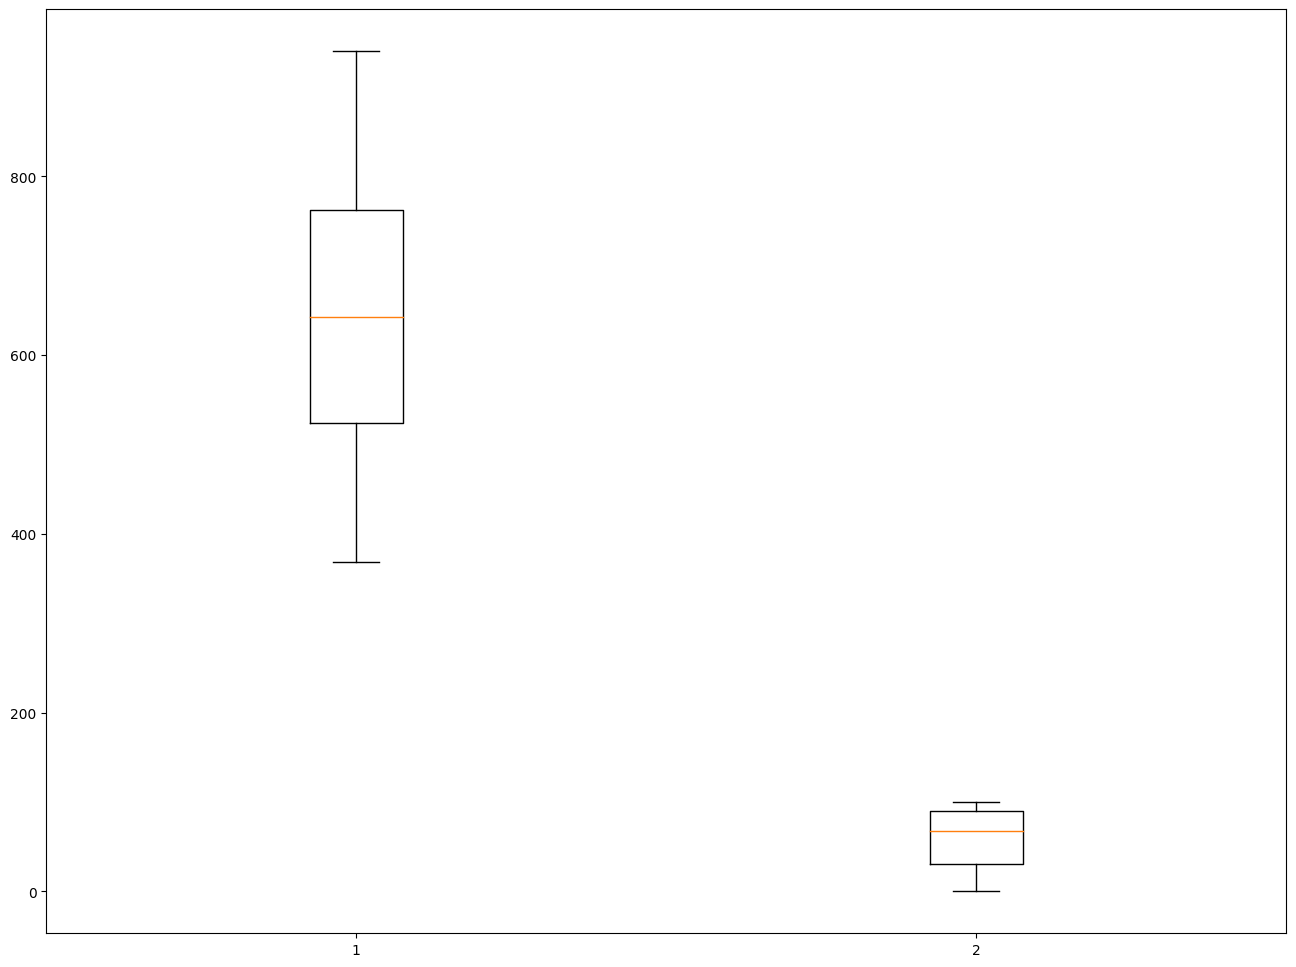

In [8]:
plt.boxplot([elemapi.api00,elemapi.meals], 0, 'gD')

**The correlation of the data**

In [9]:
# check correlation between each variable and api00
print(elemapi.corr())

              snum      dnum     api00     api99    growth     meals  \
snum      1.000000  0.405188  0.216457  0.214426 -0.030064 -0.217336   
dnum      0.405188  1.000000 -0.011383  0.006779 -0.103641  0.056105   
api00     0.216457 -0.011383  1.000000  0.985343 -0.108158 -0.900698   
api99     0.214426  0.006779  0.985343  1.000000 -0.276158 -0.908130   
growth   -0.030064 -0.103641 -0.108158 -0.276158  1.000000  0.217664   
meals    -0.217336  0.056105 -0.900698 -0.908130  0.217664  1.000000   
ell      -0.197593 -0.110872 -0.767634 -0.762804  0.120448  0.772377   
yr_rnd   -0.130887 -0.102553 -0.475440 -0.471989  0.071921  0.418451   
not_hsg  -0.104326  0.034847 -0.683255 -0.673517  0.075511  0.683641   
hsg      -0.140020  0.138073 -0.355809 -0.361286  0.100793  0.405390   
some_col  0.039400  0.159467  0.261527  0.266320 -0.078559 -0.218951   
col_grad  0.072022 -0.027562  0.527301  0.524083 -0.083319 -0.559547   
grad_sch  0.112579 -0.038323  0.633241  0.644064 -0.185654 -0.63

C:\Users\adityam\AppData\Local\Temp\ipykernel_9148\1819110521.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(elemapi.corr())


In [10]:
# check correlation between each variable and api00
print(elemapi.corr().loc['api00', :].sort_values())

meals      -0.900698
mealcat    -0.867260
ell        -0.767634
not_hsg    -0.683255
emer       -0.582731
yr_rnd     -0.475440
hsg        -0.355809
enroll     -0.318172
lgenroll   -0.274750
growth     -0.108158
dnum       -0.011383
snum        0.216457
some_col    0.261527
collcat     0.274326
col_grad    0.527301
full        0.574414
grad_sch    0.633241
abv_hsg     0.683255
api99       0.985343
api00       1.000000
Name: api00, dtype: float64


C:\Users\adityam\AppData\Local\Temp\ipykernel_9148\2281533533.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(elemapi.corr().loc['api00', :].sort_values())


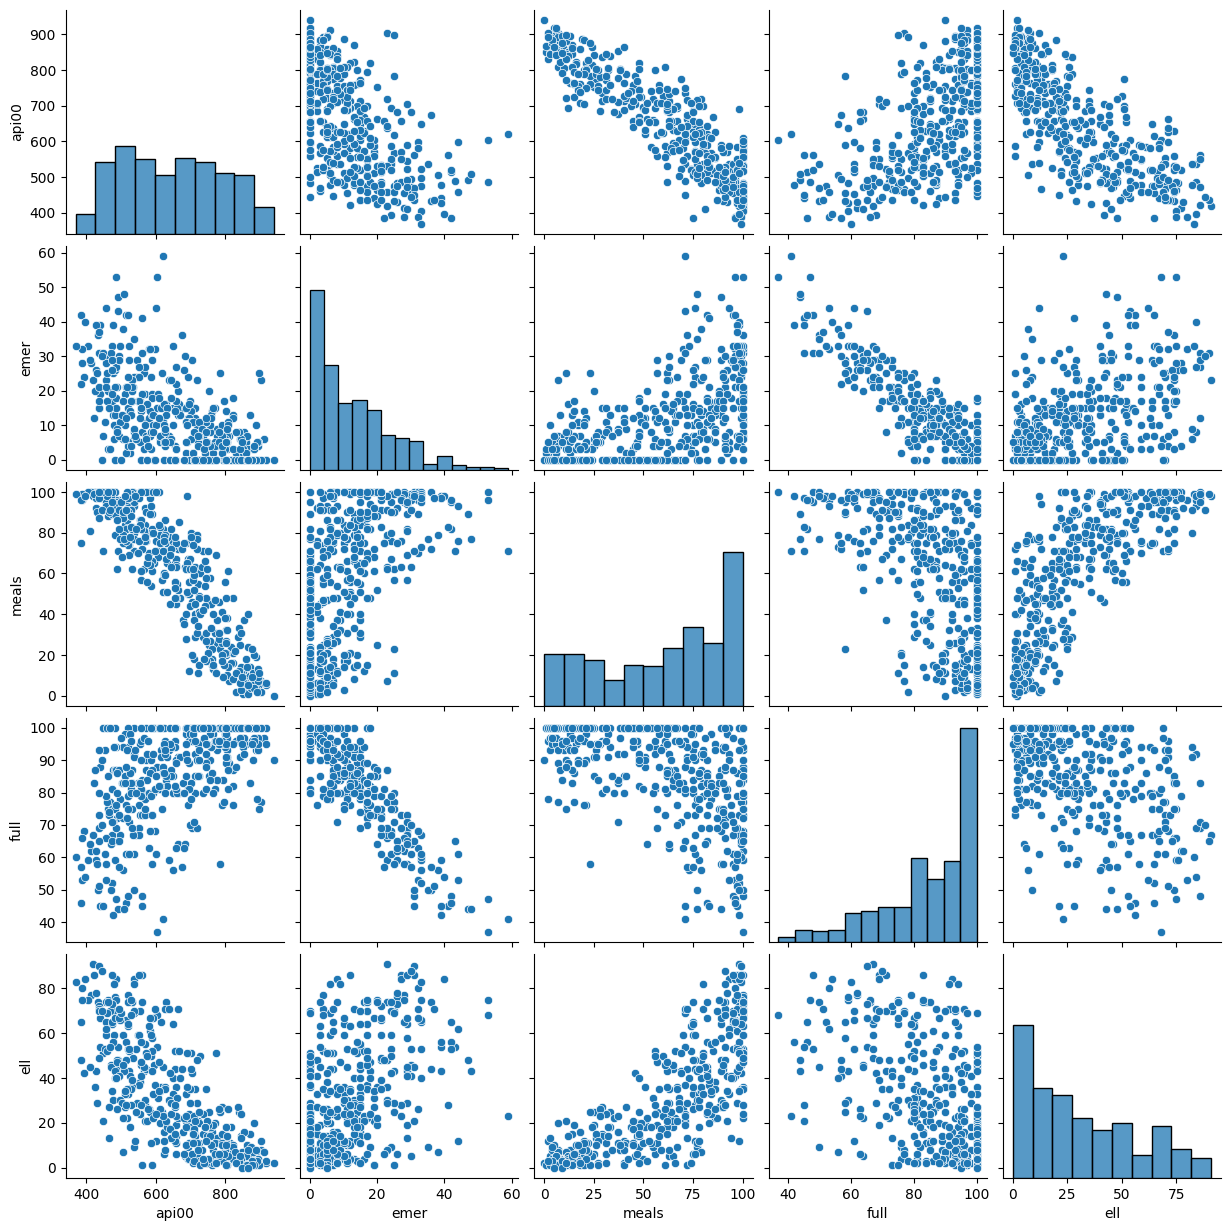

In [11]:
sns.pairplot(elemapi[['api00', 'emer', 'meals',  'full', 'ell']].dropna(how = 'any', axis = 0))


C:\Users\adityam\AppData\Local\Temp\ipykernel_13268\2823479871.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.3`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.array(elemapi.ell), bw=0.3)


<Axes: ylabel='Density'>

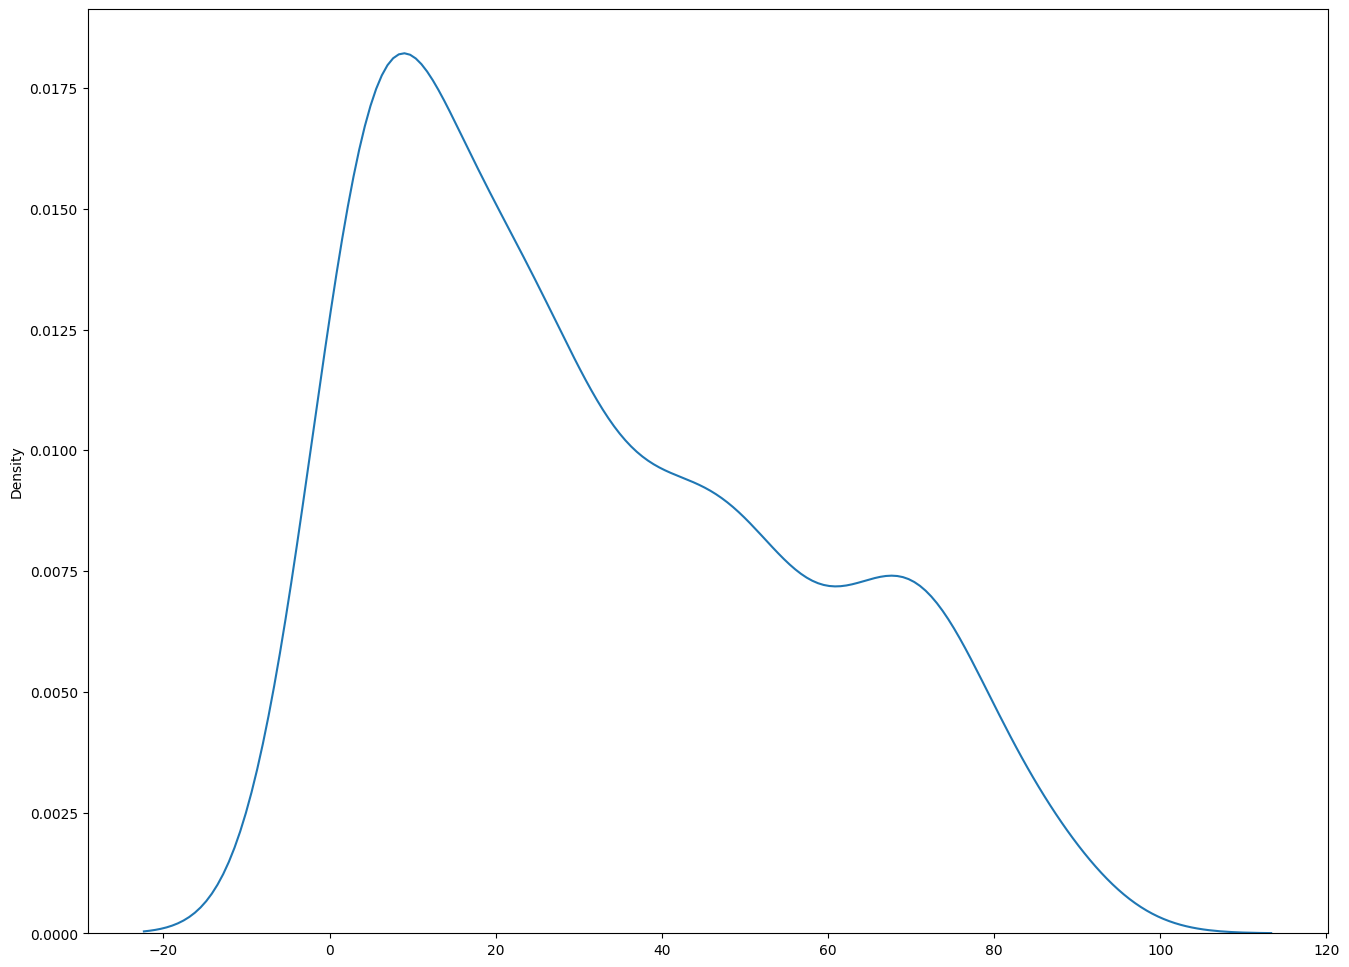

In [28]:
sns.kdeplot(np.array(elemapi.ell), bw=0.3)

In [29]:
elemapi.acs_k3.value_counts(dropna = False).sort_index()

        2
14      2
15      1
16     14
17     20
18     64
19    144
20     99
21     43
22      7
23      3
25      1
Name: acs_k3, dtype: int64